In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per leggere i dati dal file
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip() and not line.startswith("Canale"):  # Ignora intestazioni
                try:
                    _, _, eventi = map(int, line.split())
                    data.append(eventi)
                except ValueError:
                    continue
    return np.array(data)

# Funzione per disegnare i conteggi per canale
def plot_counts(data):
    channels = np.arange(len(data))
    plt.figure(figsize=(12, 6))
    plt.bar(channels, data, width=1.0, color='skyblue', edgecolor='black')
    plt.title("Conteggi per canale")
    plt.xlabel("Canale")
    plt.ylabel("Numero di eventi")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


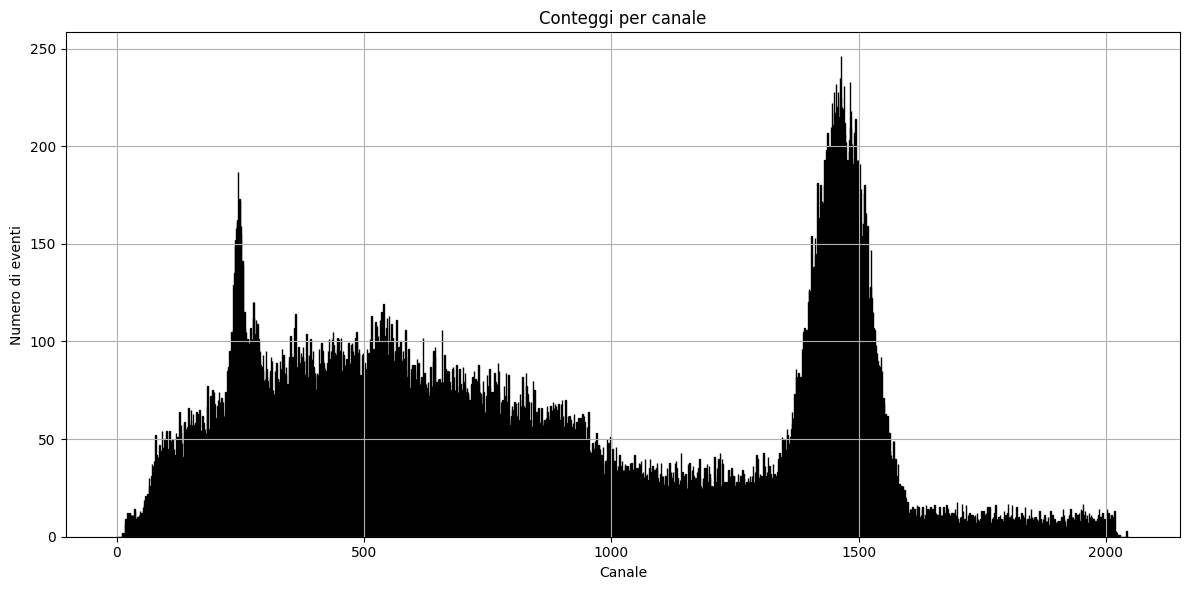

In [21]:

filename = "tot_15.txt"
data = read_data(filename)
plot_counts(data)


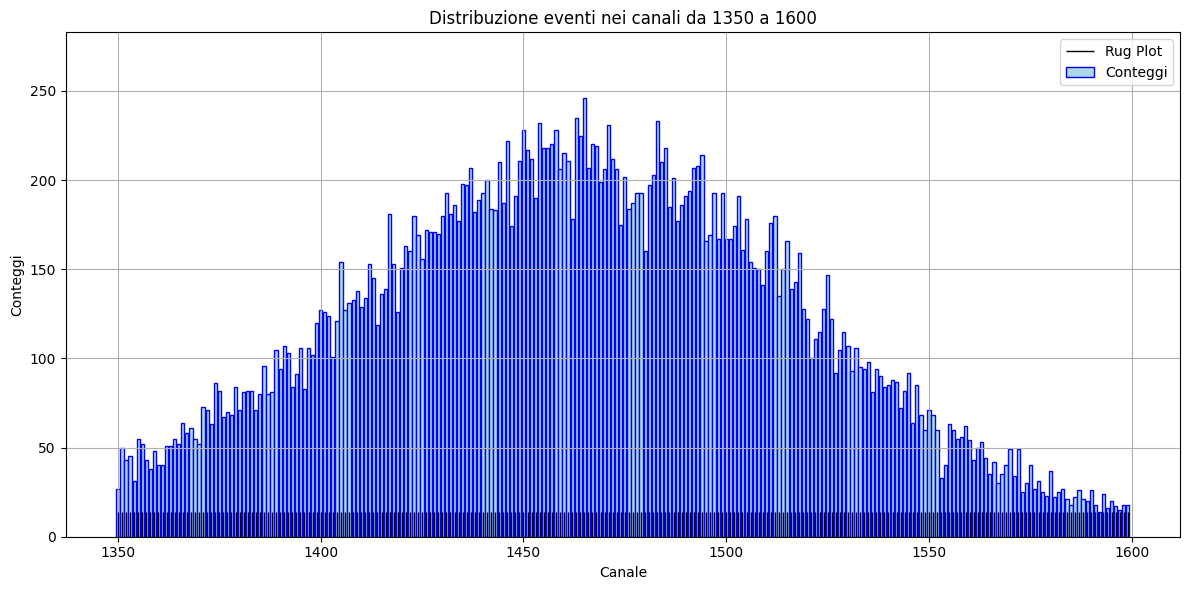

In [22]:
import seaborn as sns

# Intervallo di canali da visualizzare
start, end = 1350, 1600
subset_channels = np.arange(start, end)
subset_data = data[start:end]  # questi sono i conteggi nei canali selezionati

plt.figure(figsize=(12, 6))

# Istogramma: asse x = canali, y = conteggi
plt.bar(subset_channels, subset_data, color='lightblue', edgecolor='blue', label="Conteggi")

# Rug plot: posizioni dei canali (una linea verticale per ogni canale)
sns.rugplot(x=subset_channels, height=0.05, color='black', label="Rug Plot")

plt.title(f"Distribuzione eventi nei canali da {start} a {end}")
plt.xlabel("Canale")
plt.ylabel("Conteggi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5936/3917698534.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm_data = subset_data / np.trapz(subset_data, subset_channels)


TypeError: the dtypes of parameters x (int64) and width (object) are incompatible

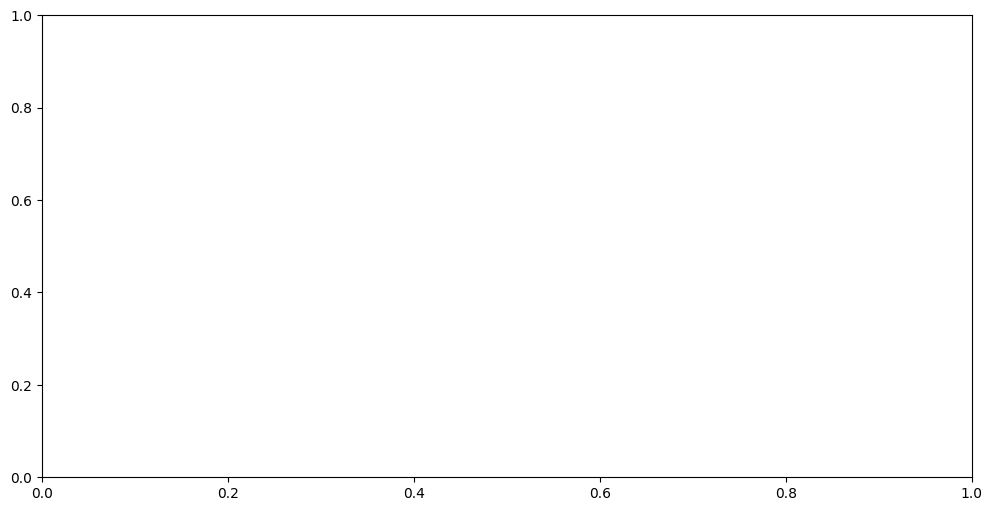

In [23]:
from sklearn.neighbors import KernelDensity

# Espandiamo i canali in base ai conteggi: se il canale 1350 ha 3 eventi, lo ripetiamo 3 volte
expanded_data = []
for i, count in enumerate(subset_data):
    expanded_data.extend([subset_channels[i]] * count)
expanded_data = np.array(expanded_data)

# Griglia per la densità
xgrid = np.linspace(start, end, 1000)

# Funzione per stimare la densità con un dato kernel
def kde(data, bandwidth, kernel):
    kde_model = KernelDensity(bandwidth=bandwidth, kernel=kernel)
    kde_model.fit(data[:, np.newaxis])
    log_pdf = kde_model.score_samples(xgrid[:, np.newaxis])
    return np.exp(log_pdf)

# Stima con diversi kernel
bandwidth = 0.05  # adatto alla scala dei canali
pdf_gaussian = kde(expanded_data, bandwidth, "gaussian")
pdf_epanech  = kde(expanded_data, bandwidth, "epanechnikov")
pdf_linear   = kde(expanded_data, bandwidth, "linear")
pdf_tophat   = kde(expanded_data, bandwidth, "tophat")

# Plot
plt.figure(figsize=(12, 6))
norm_data = subset_data / np.trapz(subset_data, subset_channels)
plt.bar(subset_channels, norm_data, ...)


plt.plot(xgrid, pdf_gaussian, label="KDE - Gaussian", linewidth=2)
plt.plot(xgrid, pdf_epanech, label="KDE - Epanechnikov", linewidth=2)
plt.plot(xgrid, pdf_linear, label="KDE - Linear", linewidth=2)
plt.plot(xgrid, pdf_tophat, label="KDE - Tophat", linewidth=2)

plt.title(f"Densità stimata nei canali da {start} a {end}")
plt.xlabel("Canale")
plt.ylabel("Conteggi / Densità stimata")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
